In [1]:
import sqlite3
import pandas as pd
import datetime as dt
import sqlalchemy.types as sqltypes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
connection = sqlite3.connect('business_track.db')
cursor = connection.cursor()

def run_query(qry):
    return pd.read_sql_query(qry, connection)

In [37]:
# connection.close()

In [3]:
!ls

2018 NBA Hackathon Application - Business Track Prompt.pdf
game_data.csv
NBA_BusinessTrack_Preliminary Analysis.ipynb
nbadata.db
player_data.csv
test_set.csv
training_set.csv


### Add Data to DB
Code commented out because database file 'nbadata.db' already created.

In [36]:
### Use script below to read in LARGE csv file by chunks
# Read in Train CSV Data into .db File
# Train_data: 200 seconds
# start = dt.datetime.now()
# chunksize = 20000
# j = 0
# index_start = 1

# for df in pd.read_csv('training_set.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
#     df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
#     df['Game_Date'] = pd.to_datetime(df['Game_Date']) # Convert to datetimes
#     df.index += index_start

#     # Columns to keep
#     columns = ['Season', 'Game_ID', 'Game_Date', 'Away_Team', 'Home_Team', 'Country', 'RoundedViewers']

#     for c in df.columns:
#         if c not in columns:
#             df = df.drop(c, axis=1)    

#     j+=1
#     df.to_sql('train_data', connection, if_exists='append') # name of SQL table, connection, append
#     print('{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize))
#     index_start = df.index[-1] + 1 # update index start

#### Add Day-of-Week Column to Training SET & Save to DB

In [73]:
# # Convert GameDATE to datetime to get day of week:
# ## Then save to db
# df = run_query('SELECT * FROM train_data')
# df['Game_Date'] = pd.to_datetime(df['Game_Date'])
# df['Day_of_Week'] = df['Game_Date'].dt.weekday_name
# df=df.drop(labels=['index'], axis=1)
# df.to_sql('train_data', connection, if_exists='replace') # name of SQL table, connection, append

In [40]:
# TEST
run_query('SELECT * FROM train_data').head()

,index,Season,Game_ID,Game_Date,Away_Team,Home_Team,Country,RoundedViewers,Day_of_Week
0,0,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C113,18,Tuesday
1,1,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C193,1,Tuesday
2,2,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C126,4,Tuesday
3,3,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C163,11,Tuesday
4,4,2016-17,21600001,2016-10-25 00:00:00,NYK,CLE,C73,3,Tuesday


In [25]:
# df = pd.read_csv('game_data.csv')
# df = df.drop(['Season', 'Game_Date'],axis=1)
# df.to_sql('game_data', connection, if_exists='replace')

In [29]:
### TEST
run_query('SELECT * FROM game_data').head()

,index,Game_ID,Team,Location,Wins_Entering_Gm,Losses_Entering_Gm,Team_Minutes,Final_Score,Lead_Changes,Ties,Largest_Lead,Full_Timeouts,Short_Timeouts,Qtr_4_Score,L2M_Score
0,0,21600001,CLE,H,0,0,240.0,117.0,1.0,3.0,32.0,4.0,1.0,82.0,113.0
1,1,21600001,NYK,A,0,0,240.0,88.0,0.0,1.0,4.0,4.0,2.0,64.0,84.0
2,2,21600002,POR,H,0,0,240.0,113.0,6.0,6.0,13.0,5.0,0.0,77.0,104.0
3,3,21600002,UTA,A,0,0,240.0,104.0,5.0,1.0,8.0,5.0,2.0,83.0,102.0
4,4,21600003,GSW,H,0,0,240.0,100.0,1.0,2.0,4.0,3.0,1.0,77.0,100.0


In [30]:
# df = pd.read_csv('player_data.csv')
# df = df.drop(['Season', 'Game_Date'],axis=1)
# df.to_sql('player_data', connection, if_exists='replace')

In [31]:
### TEST
run_query('SELECT * FROM player_data').head()

,index,Game_ID,Team,Person_ID,Name,ASG_Team,Active_Status,Minutes,Points,Defensive_Rebounds,...,Steals,Blocks,Turnovers,Field_Goals,Field_Goals_Attempted,Three_Pointers,Three_Pointers_Attempted,Free_Throws,Free_Throws_Attempted,Personal_Fouls
0,0,21600001,CLE,101112,Channing Frye,None,Active,14.0,6.0,2.0,...,1.0,1.0,1.0,2.0,6.0,2.0,5.0,0.0,0.0,4.0
1,1,21600001,CLE,201567,Kevin Love,East ASG,Active,25.0,23.0,10.0,...,3.0,0.0,2.0,6.0,15.0,2.0,6.0,9.0,12.0,3.0
2,2,21600001,CLE,202681,Kyrie Irving,East ASG,Active,30.0,29.0,1.0,...,2.0,0.0,0.0,12.0,22.0,4.0,7.0,1.0,1.0,1.0
3,3,21600001,CLE,202684,Tristan Thompson,None,Active,22.0,0.0,4.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,4,21600001,CLE,202697,Iman Shumpert,None,Active,14.0,2.0,1.0,...,0.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0


In [34]:
# df = pd.read_csv('test_set.csv')
# df.to_sql('test_set', connection, if_exists='replace')

In [35]:
### TEST
run_query('SELECT * FROM test_set').head()

,index,Season,Game_ID,Game_Date,Away_Team,Home_Team,Total_Viewers
0,0,2016-17,21600010,10/26/2016,DEN,NOP,None
1,1,2016-17,21600023,10/28/2016,HOU,DAL,None
2,2,2016-17,21600027,10/29/2016,BOS,CHA,None
3,3,2016-17,21600026,10/29/2016,ATL,PHI,None
4,4,2016-17,21600048,11/1/2016,LAL,IND,None


### Total Viewership by Game

In [64]:
# Check first rows of imported train_data
run_query('SELECT sum(RoundedViewers) FROM train_data')

,sum(RoundedViewers)
0,33935419


In [65]:
# Aggregate all countries per game:
game_df = run_query('SELECT Season, Game_ID, Game_Date, Away_Team, Home_Team,count(Country) as NumCountries, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Game_ID')
game_df['Game_Date'] = pd.to_datetime(game_df['Game_Date'])  # Convert Date from string to datetime object
print(game_df.describe()[['NumCountries', 'TotalViews']])
game_df.head()

       NumCountries    TotalViews
count   2000.000000   2000.000000
mean     140.312500  16967.709500
std       17.953161  10906.922749
min       85.000000   1899.000000
25%      128.000000   9328.500000
50%      141.000000  14271.500000
75%      153.000000  21841.750000
max      193.000000  89246.000000


,Season,Game_ID,Game_Date,Away_Team,Home_Team,NumCountries,TotalViews
0,2016-17,21600001,2016-10-25,NYK,CLE,177,57691
1,2016-17,21600002,2016-10-25,UTA,POR,169,40740
2,2016-17,21600003,2016-10-25,SAS,GSW,185,60428
3,2016-17,21600004,2016-10-26,MIA,ORL,148,22756
4,2016-17,21600005,2016-10-26,DAL,IND,162,33922


In [14]:
# Maximum Viewership
print('Information about largest spike:')
print(date_df.loc[date_df['TotalViews'] == date_df['TotalViews'].max()])
pd.read_sql_query("SELECT Game_ID, Away_Team, Home_Team, Sum(RoundedViewers) as Views FROM train_data WHERE Game_Date = '2017-10-20 00:00:00' GROUP BY Game_ID ORDER BY Views desc", connection)

Information about largest spike:
               Game_Date  TotalViews
165  2017-10-20 00:00:00      255995


,Game_ID,Away_Team,Home_Team,Views
0,21700025,GSW,NOP,49468
1,21700021,CLE,MIL,44508
2,21700019,BOS,PHI,44501
3,21700026,LAL,PHX,44171
4,21700023,UTA,MIN,25978
5,21700020,DET,WAS,21300
6,21700022,ORL,BKN,15211
7,21700018,POR,IND,10858


#### By Season

Summary for 2016-2017:
       NumCountries    TotalViews
count   1013.000000   1013.000000
mean     143.667325  16774.337611
std       17.137288  10039.009483
min       95.000000   2955.000000
25%      132.000000   9611.000000
50%      144.000000  14271.000000
75%      156.000000  21758.000000
max      193.000000  70992.000000

Summary for 2017-2018:
       NumCountries    TotalViews
count    987.000000    987.000000
mean     136.869301  17166.175279
std       18.127231  11732.961813
min       85.000000   1899.000000
25%      124.000000   8955.000000
50%      138.000000  14285.000000
75%      150.000000  22003.500000
max      193.000000  89246.000000


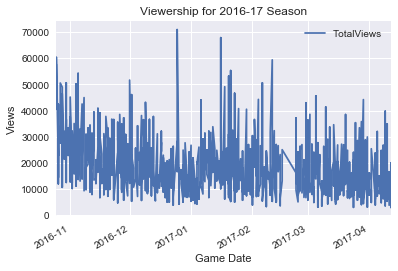

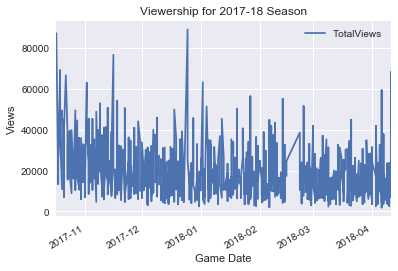

In [33]:
games1617 = game_df[game_df['Season'] == '2016-17']
games1718 = game_df[game_df['Season'] == '2017-18']

print('Summary for 2016-2017:')
print(games1617.filter(['NumCountries', 'TotalViews']).describe())
print()
print('Summary for 2017-2018:')
print(games1718.filter(['NumCountries', 'TotalViews']).describe())

games1617.plot(x= 'Game_Date', y = 'TotalViews', title = 'Viewership for 2016-17 Season').set(xlabel = 'Game Date', ylabel='Views') #Plot ALL
games1718.plot(x= 'Game_Date', y = 'TotalViews', title = 'Viewership for 2017-18 Season').set(xlabel = 'Game Date', ylabel='Views')

Appears to peak in viewership at the start of season, and during Christmas time. The Large # of spikes seems to indicate that viewership might be highly dependent on day of the week, and the teams playing. THE GAP in February is All-Star Break.

#### Top 5 Games Each Season

In [78]:
print('2016-17 Season:')
games1617.sort_values(by='TotalViews',ascending=False).head()

2016-17 Season:


,Season,Game_ID,Game_Date,Away_Team,Home_Team,NumCountries,TotalViews
374,2016-17,21600457,2016-12-25,GSW,CLE,184,70992
506,2016-17,21600619,2017-01-16,CLE,GSW,193,67876
2,2016-17,21600003,2016-10-25,SAS,GSW,185,60428
657,2016-17,21600813,2017-02-11,GSW,OKC,190,59381
0,2016-17,21600001,2016-10-25,NYK,CLE,177,57691


In [79]:
print('2017-18 Season:')
games1718.sort_values(by='TotalViews',ascending=False).head()

2017-18 Season:


,Season,Game_ID,Game_Date,Away_Team,Home_Team,NumCountries,TotalViews
1419,2017-18,21700494,2017-12-25,CLE,GSW,190,89246
1013,2017-18,21700001,2017-10-17,BOS,CLE,193,87412
1186,2017-18,21700215,2017-11-16,GSW,BOS,177,76848
1024,2017-18,21700015,2017-10-19,NYK,OKC,170,69428
1996,2017-18,21701225,2018-04-11,DEN,MIN,174,68399


Notes on above: Christmas Day game get the most views for both seasons. Next comes opening week games - for LARGE market cities & superstar players. Includes rivalry games (GSW vs OKC after Durant moved) and games that determined playoff seedings (DEN vs MIN in 2017-2018)

#### By Day of Week

In [60]:
dow_df = run_query('SELECT count(distinct Game_ID), Day_of_Week ,sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Day_of_Week ORDER BY 3 desc')
dow_df

,count(distinct Game_ID),Day_of_Week,TotalViews
0,352,Friday,5830786
1,392,Wednesday,5738863
2,298,Saturday,5178103
3,290,Monday,4717860
4,255,Tuesday,4458836
5,235,Sunday,4297509
6,178,Thursday,3713462


Normalize to get average number of views per game per day-of-week:

In [68]:
dow_df['AvgViews_perGame'] = dow_df['TotalViews'] / dow_df['count(distinct Game_ID)']
dow_df.sort_values(by=['AvgViews_perGame'], ascending=False)

,count(distinct Game_ID),Day_of_Week,TotalViews,AvgViews_perGame
6,178,Thursday,3713462,20862.146067
5,235,Sunday,4297509,18287.272340
4,255,Tuesday,4458836,17485.631373
2,298,Saturday,5178103,17376.184564
0,352,Friday,5830786,16564.732955
3,290,Monday,4717860,16268.482759
1,392,Wednesday,5738863,14639.956633


#### By Team

In [ ]:
# Total Viewership by HomeTeam
run_query('SELECT Home_Team, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Home_Team ORDER BY TotalViews desc')

In [ ]:
# Total Viewership by AwayTeam
run_query('SELECT Away_Team, sum(RoundedViewers) as TotalViews FROM train_data GROUP BY Away_Team ORDER BY TotalViews desc')

## Approach:
For Team and Day of Week, we can use one-hot encoding (since categorical variables)

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [72]:
# Distinct Game IDs (2000 in total)
run_query("SELECT count(distinct Game_ID) FROM train_data")

,count(distinct Game_ID)
0,2000
